In [1]:
from hml.generators import Madgraph5

Welcome to JupyROOT 6.24/02


In [2]:
g = Madgraph5(
    executable="mg5_aMC",
    processes=["p p > z z, z > j j, z > vl vl~"],
    output="data/pp2zz_z2jj_z2vlvl",
    shower="Pythia8",
    detector="Delphes",
    n_events=1000,
)

In [3]:
g.clean()

In [4]:
g.launch()

Generating events...
Running Pythia8...
Running Delphes...
Storing files...
Done


In [5]:
g.summary()

                  p p > z z, z > j j, z > vl vl~                   
┏━━━┳━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━┓
┃ # ┃ Name     ┃ Tag   ┃   Cross section (pb)   ┃ N events ┃ Seed ┃
┡━━━╇━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━┩
│ 0 │ run_1[1] │ tag_1 │ 1.989e+00 +- 1.324e-02 │    1,000 │   42 │
└───┴──────────┴───────┴────────────────────────┴──────────┴──────┘
                  Output: data/pp2zz_z2jj_z2vlvl                   

In [6]:
g.seed = 123
g.tag = "ptj=10,etaj=2.4"
g.settings["ptj"] = 10
g.settings["etaj"] = 2.4

g.launch(show_status=False)
g.summary()

                       p p > z z, z > j j, z > vl vl~                        
┏━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━┓
┃ # ┃ Name     ┃ Tag             ┃   Cross section (pb)   ┃ N events ┃ Seed ┃
┡━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━┩
│ 0 │ run_1[1] │ tag_1           │ 1.989e+00 +- 1.324e-02 │    1,000 │   42 │
│ 1 │ run_2[1] │ ptj=10,etaj=2.4 │ 1.956e+00 +- 1.537e-02 │    1,000 │  123 │
└───┴──────────┴─────────────────┴────────────────────────┴──────────┴──────┘
                       Output: data/pp2zz_z2jj_z2vlvl                        

In [7]:
run = g.runs[1]
print("Name:", run.name)
print("N Subruns:", run.n_subruns)
print("Tag:", run.tag)
print("Cross section:", run.cross_section)
print("Error:", run.error)
print("N events:", run.n_events)
print("Seed:", run.seed)

Name: run_2
N Subruns: 1
Tag: ptj=10,etaj=2.4
Cross section: 1.95604
Error: 0.015374662254501723
N events: 1000
Seed: 123


In [8]:
for event in run.events:
    print(f"n_jets: {event.Jet_size}")
    print(f"n_fat_jets: {event.FatJet_size}")
    break

n_jets: 3
n_fat_jets: 0


In [9]:
g.remove("run_1") # remove the first run
g.summary()

                       p p > z z, z > j j, z > vl vl~                        
┏━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━┓
┃ # ┃ Name     ┃ Tag             ┃   Cross section (pb)   ┃ N events ┃ Seed ┃
┡━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━┩
│ 0 │ run_2[1] │ ptj=10,etaj=2.4 │ 1.956e+00 +- 1.537e-02 │    1,000 │  123 │
└───┴──────────┴─────────────────┴────────────────────────┴──────────┴──────┘
                       Output: data/pp2zz_z2jj_z2vlvl                        

In [10]:
g.launch()

Generating events...
Running Pythia8...
Running Delphes...
Storing files...
Done


In [13]:
signal_generator = Madgraph5(
    executable="mg5_aMC",
    processes=["p p > z z, z > j j, z > ve ve~"],
    output="./data/pp2zz",
    shower="Pythia8",
    detector="Delphes",
    settings={"htjmin": 400}
)
background_generator = Madgraph5(
    executable="mg5_aMC",
    processes=["p p > j j / z"],
    output="./data/pp2jj",
    shower="Pythia8",
    detector="Delphes",
    settings={"htjmin": 400},
)

In [14]:
signal_generator.launch(show_status=False)
signal_generator.summary()
background_generator.launch(show_status=False)
background_generator.summary()

                  p p > z z, z > j j, z > ve ve~                   
┏━━━┳━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━┓
┃ # ┃ Name     ┃ Tag   ┃   Cross section (pb)   ┃ N events ┃ Seed ┃
┡━━━╇━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━┩
│ 0 │ run_1[1] │ tag_1 │ 7.703e-04 +- 3.118e-06 │   10,000 │   42 │
└───┴──────────┴───────┴────────────────────────┴──────────┴──────┘
                        Output: data/pp2zz                         

                           p p > j j / z                           
┏━━━┳━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━┓
┃ # ┃ Name     ┃ Tag   ┃   Cross section (pb)   ┃ N events ┃ Seed ┃
┡━━━╇━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━┩
│ 0 │ run_1[1] │ tag_1 │ 5.685e+04 +- 1.283e+02 │   10,000 │   42 │
└───┴──────────┴───────┴────────────────────────┴──────────┴──────┘
                        Output: data/pp2jj                         

In [15]:
sig_run = signal_generator.runs[0]
bkg_run = background_generator.runs[0]

In [16]:
from hml.representations import Set
from hml.observables import Pt, M, DeltaR

representation = Set(
    [
        Pt("Jet1"),
        Pt("Jet2"),
        DeltaR("Jet1", "Jet2"),
        M("FatJet1"),
    ]
)

In [17]:
data, target = [], []

for event in sig_run.events:
    if event.Jet_size >= 2 and event.FatJet_size >= 1:
        representation.from_event(event)
        data.append(representation.values)
        target.append(1)

for event in bkg_run.events:
    if event.Jet_size >= 2 and event.FatJet_size >= 1:
        representation.from_event(event)
        data.append(representation.values)
        target.append(0)

In [18]:
import numpy as np
from hml.datasets import Dataset


data = np.array(data, dtype=np.float32)
target = np.array(target, dtype=np.int32)

dataset = Dataset(
    data,
    target,
    feature_names=representation.names,
    target_names=["pp2jj", "pp2zz"],
    description="Z vs QCD jets",
    dir_path="./data/z_vs_qcd",
)

In [19]:
dataset.save()

In [1]:
from hml.datasets import Dataset
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

In [2]:
# Split the data into training and testing sets
dataset = Dataset.load("./data/z_vs_qcd")

x_train, x_test, y_train, y_test = train_test_split(
    dataset.data, dataset.target, test_size=0.2, random_state=42
)

# Convert the labels to categorical
y_train = to_categorical(y_train, dtype="int32")
y_test = to_categorical(y_test, dtype="int32")

# Show the shape of the training and testing sets
print("> Train and test shapes:")
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape, "y_test shape:", y_test.shape)
print(f"> target names: {dataset.target_names}")

> Train and test shapes:
x_train shape: (12889, 4) y_train shape: (12889, 2)
x_test shape: (3223, 4) y_test shape: (3223, 2)
> target names: ['pp2jj', 'pp2zz']


In [3]:
from hml.methods import CutAndCount, BoostedDecisionTree, ToyMLP
from keras.losses import CategoricalCrossentropy
from keras.metrics import CategoricalAccuracy
from hml.metrics import MaxSignificance, RejectionAtEfficiency

In [4]:
method1 = BoostedDecisionTree(n_estimators=10)
method1.compile(
    metrics=[
        CategoricalAccuracy(name="acc"),
        MaxSignificance(name="max_sig"),
        RejectionAtEfficiency(name="r50"),
    ]
)

print("> Training model:")
history = method1.fit(x_train, y_train)

> Training model:
Iter 1/10 - loss: 1.2124 - acc: 0.8815 - max_sig: 193.1740 - r50: 356.5397
Iter 2/10 - loss: 1.0794 - acc: 0.9131 - max_sig: 254.9458 - r50: 122.9463
Iter 3/10 - loss: 0.9685 - acc: 0.9283 - max_sig: 310.2836 - r50: 293.0483
Iter 4/10 - loss: 0.8748 - acc: 0.9358 - max_sig: 354.9109 - r50: 180.5289
Iter 5/10 - loss: 0.7942 - acc: 0.9413 - max_sig: 383.2777 - r50: 256.5062
Iter 6/10 - loss: 0.7231 - acc: 0.9455 - max_sig: 418.4313 - r50: 270.7895
Iter 7/10 - loss: 0.6598 - acc: 0.9492 - max_sig: 451.7975 - r50: 230.0276
Iter 8/10 - loss: 0.6051 - acc: 0.9516 - max_sig: 489.0055 - r50: 352.1394
Iter 9/10 - loss: 0.5573 - acc: 0.9538 - max_sig: 523.7005 - r50: 307.0688
Iter 10/10 - loss: 0.5143 - acc: 0.9557 - max_sig: 556.1749 - r50: 367.5613


In [5]:
method2 = CutAndCount()
method2.compile(
    loss=CategoricalCrossentropy(),
    metrics=[
        CategoricalAccuracy(name="acc"),
        MaxSignificance(name="max_sig"),
        RejectionAtEfficiency(name="r50"),
    ],
)
print("> Training model:")
history = method2.fit(x_train, y_train)

> Training model:
Cut 1/4 - loss: 2.0946 - acc: 0.8700 - max_sig: 109.0580 - r50: 7.3591
Cut 2/4 - loss: 2.1672 - acc: 0.8678 - max_sig: 168.8623 - r50: 14.2052
Cut 3/4 - loss: 3.7816 - acc: 0.8337 - max_sig: 204.4822 - r50: 21.2865
Cut 4/4 - loss: 4.4206 - acc: 0.8067 - max_sig: 231.2802 - r50: 28.3538


In [6]:
method3 = ToyMLP(input_shape=(x_train.shape[1],))
method3.compile(
    loss=CategoricalCrossentropy(),
    metrics=[
        CategoricalAccuracy(name="acc"),
        MaxSignificance(name="max_sig"),
        RejectionAtEfficiency(name="r50"),
    ],
)

print("> Training model:")
history = method3.fit(x_train, y_train, epochs=10, batch_size=256, verbose=2)

> Training model:
Epoch 1/10
51/51 - 6s - loss: 0.8011 - acc: 0.8745 - max_sig: 136.1004 - r50: 30.0885 - 6s/epoch - 111ms/step
Epoch 2/10
51/51 - 1s - loss: 0.4885 - acc: 0.8883 - max_sig: 384.5484 - r50: 85.9151 - 875ms/epoch - 17ms/step
Epoch 3/10
51/51 - 1s - loss: 0.3906 - acc: 0.9108 - max_sig: 400.8351 - r50: 134.5453 - 845ms/epoch - 17ms/step
Epoch 4/10
51/51 - 1s - loss: 0.4031 - acc: 0.9107 - max_sig: 416.7090 - r50: 173.9244 - 865ms/epoch - 17ms/step
Epoch 5/10
51/51 - 1s - loss: 0.3873 - acc: 0.9136 - max_sig: 231.8324 - r50: 182.8426 - 872ms/epoch - 17ms/step
Epoch 6/10
51/51 - 1s - loss: 0.3439 - acc: 0.9215 - max_sig: 231.8678 - r50: 142.6177 - 839ms/epoch - 16ms/step
Epoch 7/10
51/51 - 1s - loss: 0.3537 - acc: 0.9206 - max_sig: 227.5455 - r50: 165.8341 - 877ms/epoch - 17ms/step
Epoch 8/10
51/51 - 1s - loss: 0.2862 - acc: 0.9311 - max_sig: 390.6052 - r50: 192.7271 - 881ms/epoch - 17ms/step
Epoch 9/10
51/51 - 1s - loss: 0.3202 - acc: 0.9213 - max_sig: 215.6774 - r50: 198.

In [7]:
results1 = method1.evaluate(x_test, y_test)
results2 = method2.evaluate(x_test, y_test)
results3 = method3.evaluate(x_test, y_test, verbose=2)

loss: 0.2572 - acc: 0.9561 - max_sig: 564.3209 - r50: 507.5595
loss: 4.4158 - acc: 0.8019 - max_sig: 237.7650 - r50: 30.1252
101/101 - 4s - loss: 0.4025 - acc: 0.9364 - max_sig: 146.5153 - r50: 890.9039 - 4s/epoch - 40ms/step


In [8]:
from rich.table import Table

table = Table("name", "loss", "acc", "max_sig", "r50")
names = ["BDT", "CutAndCount", "ToyMLP"]
for res, name in zip([results1, results2, results3], names):
    table.add_row(name, *[f"{v[0]:.4f}" for v in res.values()])

table

┏━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┓
┃ name        ┃ loss   ┃ acc    ┃ max_sig  ┃ r50      ┃
┡━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━┩
│ BDT         │ 0.2572 │ 0.9561 │ 564.3209 │ 507.5595 │
│ CutAndCount │ 4.4158 │ 0.8019 │ 237.7650 │ 30.1252  │
│ ToyMLP      │ 0.4025 │ 0.9364 │ 146.5153 │ 890.9039 │
└─────────────┴────────┴────────┴──────────┴──────────┘

In [9]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [13]:
method1_proba = method1.predict(x_test)
method2_proba = method2.predict(x_test)
method3_proba = method3.predict(x_test)

101/101 [==============================] - 0s 1ms/step


In [14]:
i = 1
fpr_bdt, tpr_bdt, _ = roc_curve(y_test[:, i], method1_proba[:, i])
roc_auc_bdt = auc(fpr_bdt, tpr_bdt)
fpr_cut, tpr_cut, _ = roc_curve(y_test[:, i], method2_proba[:, i])
roc_auc_cut = auc(fpr_cut, tpr_cut)
fpr_mlp, tpr_mlp, _ = roc_curve(y_test[:, i], method3_proba[:, i])
roc_auc_mlp = auc(fpr_mlp, tpr_mlp)


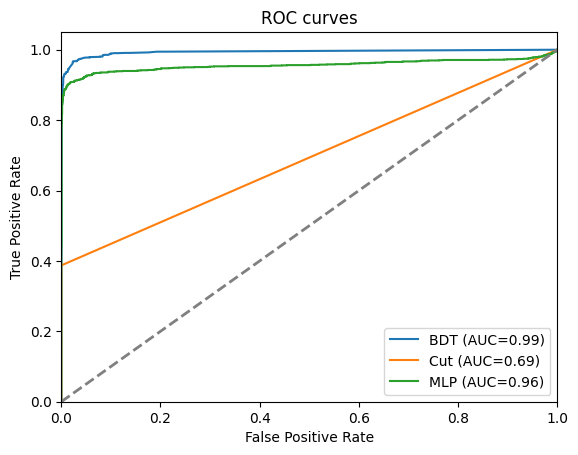

In [24]:
# Plotting
plt.plot(fpr_bdt, tpr_bdt, label=f"BDT (AUC={roc_auc_bdt:0.2f})")
plt.plot(fpr_cut, tpr_cut, label=f"Cut (AUC={roc_auc_cut:0.2f})")
plt.plot(fpr_mlp, tpr_mlp, label=f"MLP (AUC={roc_auc_mlp:0.2f})")

plt.plot([0, 1], [0, 1], ls="--", color="gray", lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curves")
plt.legend(loc="lower right")
plt.savefig("roc_curves.png", bbox_inches='tight')
plt.show()